<a href="https://colab.research.google.com/github/hvakanksha/LastMileDeliveryDescriptiveStats/blob/main/LastMileDeliveryDescriptiveAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns

In [2]:
# Loading the data
data = pd.read_csv("lastMileDeliveryTimesWithCats.csv")

In [3]:
data.head()

,DeliveryTime,NumberPackagesDelivered,Temperature,DistanceToCityCenterFromDC,DriverExperience,DriverSafetyIncidents,VehicleType,FulfillmentChannel
0,6.7,110,61.9,32.0,13.2,3,Gas,SFS
1,6.1,96,42.3,30.7,12.7,2,Gas,SFS
2,2.6,94,40.6,30.3,13.7,4,Gas,SFDC
3,7.5,98,57.2,33.7,8.3,4,Electric,SFS
4,3.4,99,61.4,28.3,13.7,4,Gas,SFS


In [5]:
# Descriptive Statistics
summary_stats = data.describe()
summary_stats

,DeliveryTime,NumberPackagesDelivered,Temperature,DistanceToCityCenterFromDC,DriverExperience,DriverSafetyIncidents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.770000,97.684000,53.201700,19.728300,10.055400,4.551000
std,2.045724,16.290351,17.400255,8.463395,3.406158,2.014313
min,0.600000,53.000000,3.700000,1.900000,0.200000,0.000000
25%,4.400000,87.000000,41.050000,13.075000,7.900000,3.000000
50%,5.800000,98.000000,53.450000,19.600000,10.000000,5.000000
75%,7.300000,109.000000,64.825000,26.000000,12.200000,6.000000
max,11.400000,153.000000,103.700000,38.100000,21.100000,12.000000


In [23]:
mode_number_packages = stats.mode(data["NumberPackagesDelivered"])
print("Mode for Number of Packages Delivered:", mode_number_packages.mode[0])
print("Frequency:", mode_number_packages.count[0])

Mode for Number of Packages Delivered: 103
Frequency: 34


<ipython-input-23-d483d3ddee29>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_number_packages = stats.mode(data["NumberPackagesDelivered"])




*   On an average around 5.7 hours are consumed everyday in deliverin packages
*   It is common to deliver around 103 packages everyday
*   On an average each driver has worked for the company for 10 years
*   On an average the safety incidents commited by the driver is around 5





In [9]:
# Correlation Analysis
correlation_matrix = data.corr()

<ipython-input-9-7c00a7d52ca1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


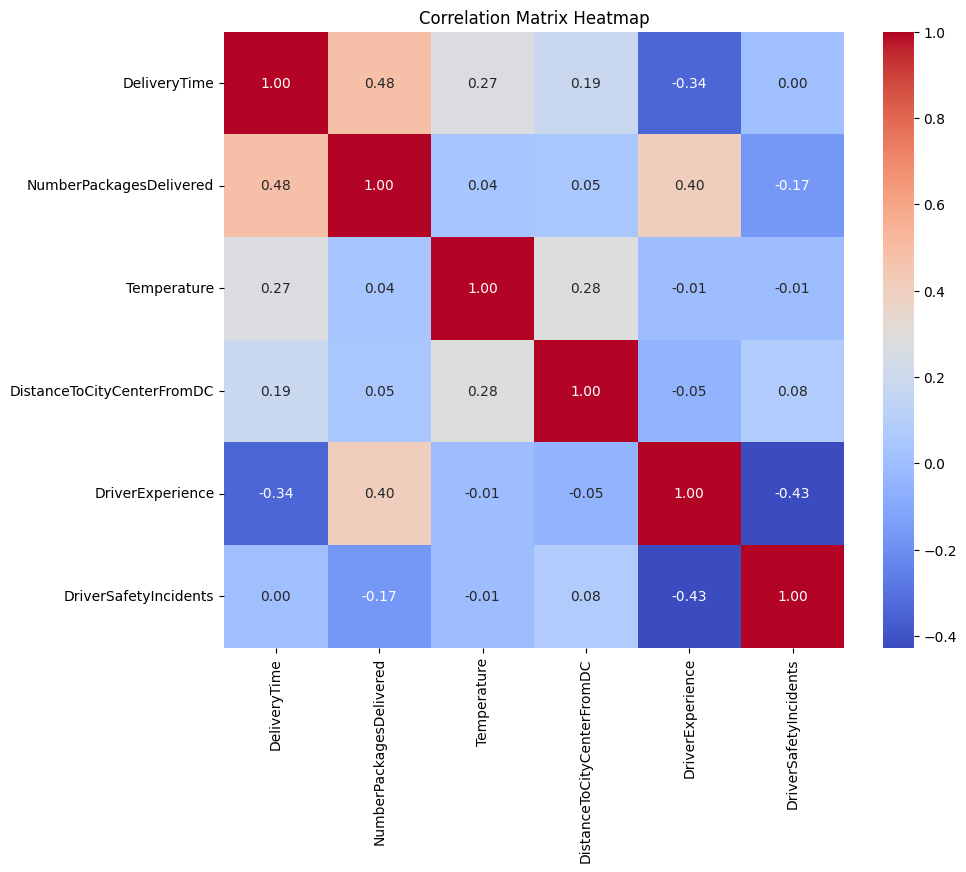

In [10]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()



*   No. of packages delivered and driver experience can be key determinants of delivery time
*   There is a negaitve correlation between Driver Safety Incidents and Driver Experience



In [12]:
# Driver Experience and Safety Incidents by Vehicle Type
vehicle_experience_safety = data.groupby("VehicleType")[["DriverExperience", "DriverSafetyIncidents"]].mean()
vehicle_experience_safety

,DriverExperience,DriverSafetyIncidents
VehicleType,,
Electric,9.697233,4.632411
Gas,10.176707,4.523427


Drivers have more experience driving Gas vehicles

In [14]:
# Average Delivery Time by Fulfillment Channel
avg_delivery_time_by_channel = data.groupby("FulfillmentChannel")["DeliveryTime"].mean()
avg_delivery_time_by_channel

FulfillmentChannel
SFDC    6.107353
SFS     5.463550
Name: DeliveryTime, dtype: float64

Delivery from SFDC takes more time

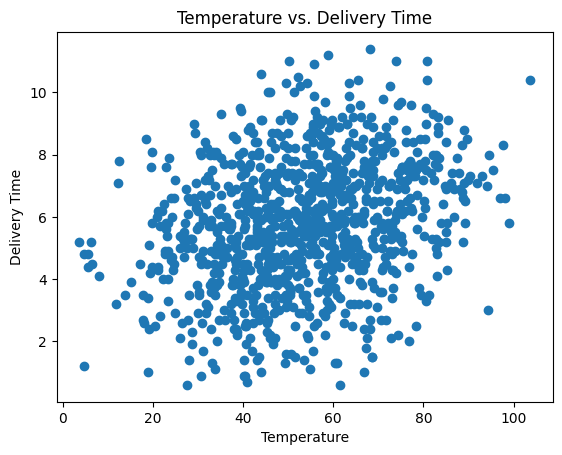

In [15]:
# Scatter Plot: Temperature vs. Delivery Time
plt.scatter(data["Temperature"], data["DeliveryTime"])
plt.xlabel("Temperature")
plt.ylabel("Delivery Time")
plt.title("Temperature vs. Delivery Time")
plt.show()

It can be observed that the delivery time between 40* F and 60* F is more. Although these temperatures are not freezing, they are still low and might cause discomfort to drivers and lead to increased delivery time

In [16]:
# T-test: Comparison of Gas and Electric Vehicles
gas_delivery_time = data[data["VehicleType"] == "Gas"]["DeliveryTime"]
electric_delivery_time = data[data["VehicleType"] == "Electric"]["DeliveryTime"]
t_stat, p_value = ttest_ind(gas_delivery_time, electric_delivery_time)



*   H1: The mean delivery time of Gas vehicles is not equal to the mean delivery time of Electric vehicles
*   Let Level of Significance =0.05




In [17]:
print("T_stat =",t_stat)
print("P_Value =",p_value)

T_stat = 0.23492459151924378
P_Value = 0.8143154535359587


In this case, the p-value is quite high (0.814), which means that there isn't strong evidence to reject the null hypothesis that the means of the two groups are significantly different. This suggests that the difference in delivery times between Gas and Electric vehicles might not be statistically significant.

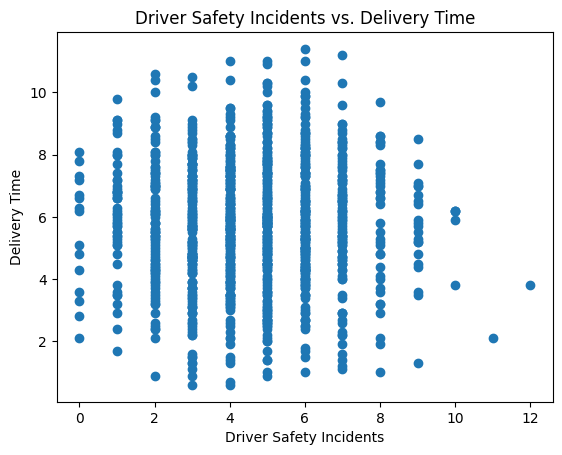

In [18]:
# Scatter Plot: Driver Safety Incidents vs. Delivery Time
plt.scatter(data["DriverSafetyIncidents"], data["DeliveryTime"])
plt.xlabel("Driver Safety Incidents")
plt.ylabel("Delivery Time")
plt.title("Driver Safety Incidents vs. Delivery Time")
plt.show()

Higher safety incidents lead to increase in delivery time. It is worthy noting that even less number of incidents might lead to increase in delivery time upto 10 hours

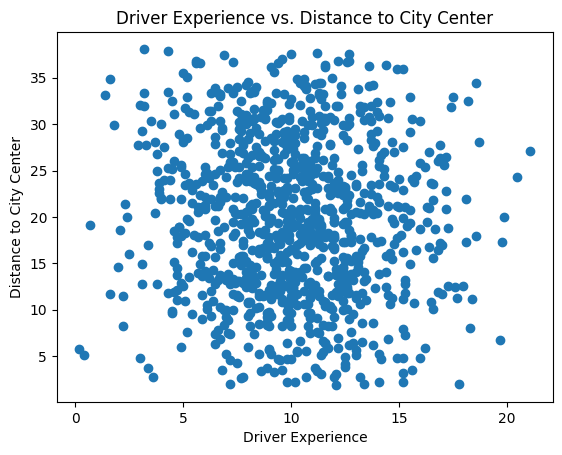

In [19]:
# Scatter Plot: Driver Experience vs. Distance to City Center
plt.scatter(data["DriverExperience"], data["DistanceToCityCenterFromDC"])
plt.xlabel("Driver Experience")
plt.ylabel("Distance to City Center")
plt.title("Driver Experience vs. Distance to City Center")
plt.show()